In [ ]:
import numpy as np
import pandas as pd

In [ ]:
X = pd.read_csv('/X.csv')

In [ ]:
X

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08
...,...,...,...,...,...,...,...,...,...
4099,7000.0,8.419260e+05,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0,4.247600e+05
4100,7000.0,7.164400e+04,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3,7.007100e+04
4101,7000.0,9.000000e+02,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8,4.831933e+07
4102,3967.0,1.044300e+04,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3,1.044300e+04


In [ ]:
y = X['worldwide_gross']

In [ ]:
X = X.drop('worldwide_gross', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [ ]:
print(len(X))
print(len(X_train))
print(len(X_test))

4104
2462
1642


In [ ]:
X.head(1)

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,760505847.0


In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
predicted.shape

(1642,)

(array([[1.276e+03, 2.750e+02, 5.100e+01, 2.500e+01, 1.000e+01, 3.000e+00,
         2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.311e+03, 2.450e+02, 3.900e+01, 2.800e+01, 1.100e+01, 5.000e+00,
         1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]]),
 array([-8.52255140e+07,  1.44058604e+08,  3.73342722e+08,  6.02626841e+08,
         8.31910959e+08,  1.06119508e+09,  1.29047920e+09,  1.51976331e+09,
         1.74904743e+09,  1.97833155e+09,  2.20761567e+09]),
 <a list of 2 Lists of Patches objects>)

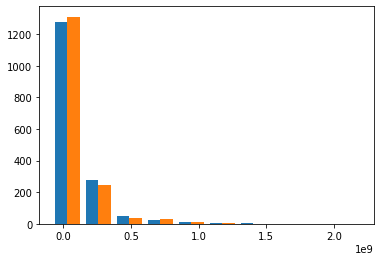

In [ ]:
import matplotlib.pyplot as plt

plt.hist([predicted, y_test])

Evaluando el modelo

In [ ]:
model.score(X_test,y_test)

0.8852340318463997

In [ ]:
residuals = y_test - predicted

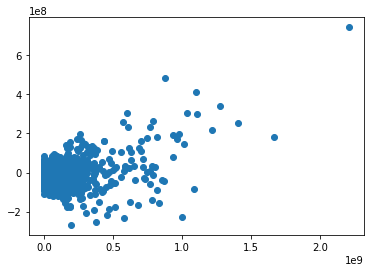

In [ ]:
plt.scatter(y_test, residuals)

In [ ]:
ap_residuals = np.abs(residuals)/ y_test

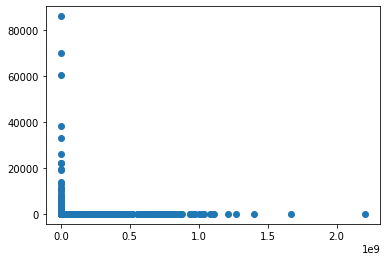

In [ ]:
plt.scatter(y_test, ap_residuals)

In [ ]:
lap_residuals = np.log(ap_residuals)

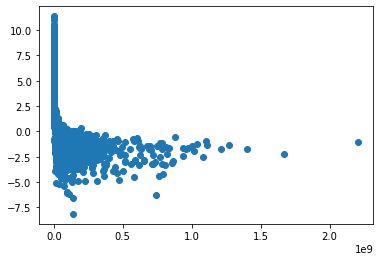

In [ ]:
plt.scatter(y_test, lap_residuals)


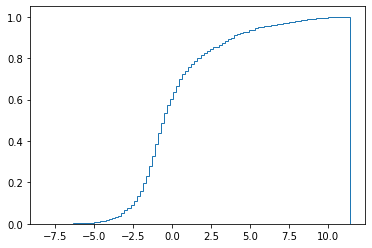

In [ ]:
plt.hist(lap_residuals,bins=100, density=True, histtype='step', cumulative=True);


array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

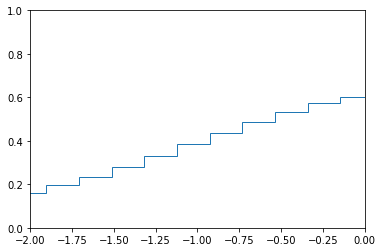

In [ ]:
plt.hist(lap_residuals,bins=100, density=True, histtype='step', cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))

Ver la correlacion de nuestros datos

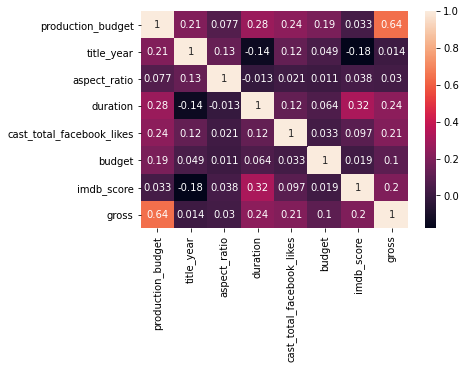

In [ ]:
import seaborn as sns
sns.heatmap(X.corr(), annot=True)